# Clustering 

The data is by the San Francisco Bay Area Rapid Transit (BART), which identifies a set of demographics for residents in a local area. Using this data lets determine residents segmentations, to develop marketing plans accordingly.<br>

VARIABLE DESCRIPTIONS:<br>

Age:

        1.   14 thru 17
        2.   18 thru 24
        3.   25 thru 34
        4.   35 thru 44
        5.   45 thru 54
        6.   55 thru 64
        7.   65 and Over

DistToWork: Distance to work in miles<br>
DualInc: Is dual income household or not<br>
Education:

        1. Grade 8 or less
        2. Grades 9 to 11
        3. Graduated high school
        4. 1 to 3 years of college
        5. College graduate
        6. Grad Study
Gender: M or F<br>
Income:

        1. Less than $10,000
        2. $10,000 to $14,999
        3. $15,000 to $19,999
        4. $20,000 to $24,999
        5. $25,000 to $29,999
        6. $30,000 to $39,999
        7. $40,000 to $49,999
        8. $50,000 to $74,999
        9. $75,000 or more
Language: Language spoken at home<br>
NbrInHouseHold: Number in household<br>
NbrInHouseholdUnder18: Number in household under 18 years old<br>
OwnRent: Own, rent, or live with parents<br>
YrsInArea: Years lived in bay area<br>
Rider: No, Non-rider; Yes, Rider

In [1]:
# Import libraries
import pandas as pd
from sklearn.cluster import KMeans
from collections import Counter
from sklearn import preprocessing
from matplotlib import pyplot as plt

In [3]:
# Read data
BartRider = pd.read_csv("BartRider.csv")
BartRider

,Age,DistToWork,DualInc,Education,Gender,Income,Language,NbrInHouseHold,NbrInHouseholdUnder18,OwnRent,YrsInArea,Rider
0,7,14,N,3,F,3,English,1,0,Rent,5,Yes
1,7,10,N,5,M,8,English,2,0,Own,5,No
2,3,9,N,3,M,1,English,1,0,Rent,5,Yes
3,1,13,N,2,M,1,English,5,3,Parent,5,Yes
4,3,14,N,5,F,2,English,3,1,Parent,5,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
5488,3,11,Y,4,M,5,English,2,0,Own,5,Yes
5489,4,9,Y,3,F,6,English,3,1,Rent,2,Yes
5490,2,7,N,4,M,2,English,1,1,Rent,1,Yes
5491,3,7,Y,3,F,9,English,2,0,Own,5,No


In [4]:
# Show the head rows of a data frame
BartRider.head()

,Age,DistToWork,DualInc,Education,Gender,Income,Language,NbrInHouseHold,NbrInHouseholdUnder18,OwnRent,YrsInArea,Rider
0,7,14,N,3,F,3,English,1,0,Rent,5,Yes
1,7,10,N,5,M,8,English,2,0,Own,5,No
2,3,9,N,3,M,1,English,1,0,Rent,5,Yes
3,1,13,N,2,M,1,English,5,3,Parent,5,Yes
4,3,14,N,5,F,2,English,3,1,Parent,5,Yes


In [5]:
# Examine variable type
BartRider.dtypes

Age                       int64
DistToWork                int64
DualInc                  object
Education                 int64
Gender                   object
Income                    int64
Language                 object
NbrInHouseHold            int64
NbrInHouseholdUnder18     int64
OwnRent                  object
YrsInArea                 int64
Rider                    object
dtype: object

In [6]:
# Change categorical variables to "category"
BartRider['DualInc'] = BartRider['DualInc'].astype('category')
BartRider['Gender'] = BartRider['Gender'].astype('category')
BartRider['Language'] = BartRider['Language'].astype('category')
BartRider['OwnRent'] = BartRider['OwnRent'].astype('category')
BartRider['Rider'] = BartRider['Rider'].astype('category')

In [7]:
# Examine variable type
BartRider.dtypes

Age                         int64
DistToWork                  int64
DualInc                  category
Education                   int64
Gender                   category
Income                      int64
Language                 category
NbrInHouseHold              int64
NbrInHouseholdUnder18       int64
OwnRent                  category
YrsInArea                   int64
Rider                    category
dtype: object

## Prepare data set for clustering¶

In [8]:
# Create dummy variables
BartRider = pd.get_dummies(BartRider, columns=['DualInc','Gender','Language','OwnRent','Rider'], drop_first=True)
BartRider

,Age,DistToWork,Education,Income,NbrInHouseHold,NbrInHouseholdUnder18,YrsInArea,DualInc_Y,Gender_M,Language_Other,Language_Spanish,OwnRent_Parent,OwnRent_Rent,Rider_Yes
0,7,14,3,3,1,0,5,0,0,0,0,0,1,1
1,7,10,5,8,2,0,5,0,1,0,0,0,0,0
2,3,9,3,1,1,0,5,0,1,0,0,0,1,1
3,1,13,2,1,5,3,5,0,1,0,0,1,0,1
4,3,14,5,2,3,1,5,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5488,3,11,4,5,2,0,5,1,1,0,0,0,0,1
5489,4,9,3,6,3,1,2,1,0,0,0,0,1,1
5490,2,7,4,2,1,1,1,0,1,0,0,0,1,1
5491,3,7,3,9,2,0,5,1,0,0,0,0,0,0


In [9]:
# Apply minmax normalization
min_max_scaler = preprocessing.MinMaxScaler()
BartRider_normalized = pd.DataFrame(min_max_scaler.fit_transform(BartRider))
BartRider_normalized.columns = BartRider.columns
BartRider_normalized

,Age,DistToWork,Education,Income,NbrInHouseHold,NbrInHouseholdUnder18,YrsInArea,DualInc_Y,Gender_M,Language_Other,Language_Spanish,OwnRent_Parent,OwnRent_Rent,Rider_Yes
0,1.000000,0.647059,0.4,0.250,0.000,0.000000,1.00,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,1.000000,0.411765,0.8,0.875,0.125,0.000000,1.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.333333,0.352941,0.4,0.000,0.000,0.000000,1.00,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,0.000000,0.588235,0.2,0.000,0.500,0.333333,1.00,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.333333,0.647059,0.8,0.125,0.250,0.111111,1.00,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5488,0.333333,0.470588,0.6,0.500,0.125,0.000000,1.00,1.0,1.0,0.0,0.0,0.0,0.0,1.0
5489,0.500000,0.352941,0.4,0.625,0.250,0.111111,0.25,1.0,0.0,0.0,0.0,0.0,1.0,1.0
5490,0.166667,0.235294,0.6,0.125,0.000,0.111111,0.00,0.0,1.0,0.0,0.0,0.0,1.0,1.0
5491,0.333333,0.235294,0.4,1.000,0.125,0.000000,1.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## Clustering model (Kmeans)

In [10]:
# Build a clustering model with n_clusters = 2. Set random_state=0.
model1 = KMeans(n_clusters=2, random_state=0)
model1.fit(BartRider_normalized)

KMeans(n_clusters=2, random_state=0)

In [11]:
# Generate the cluster labels
model1.labels_

array([0, 1, 0, ..., 0, 1, 0], dtype=int32)

In [12]:
# Show cluster size
Counter(model1.labels_)

Counter({0: 2334, 1: 3159})

In [13]:
# Show cluster centroids
pd.DataFrame({'cluster 1':BartRider[model1.labels_==0].mean(axis=0), 'cluster 2':BartRider[model1.labels_==1].mean(axis=0)})

,cluster 1,cluster 2
Age,2.562982,4.163976
DistToWork,11.413882,11.533713
Education,3.209940,4.361823
Income,2.846187,6.870529
NbrInHouseHold,3.255356,2.646724
NbrInHouseholdUnder18,0.897601,0.566635
YrsInArea,4.239931,4.330801
DualInc_Y,0.063839,0.377018
Gender_M,0.442159,0.475783
Language_Other,0.050557,0.014562


Cluster 1 is about 97.6% for BART riders.<br>
Cluster 2 is about 2.4% for BART riders. <br><br>


Cluster 1 could be students living with parents, lower income, and most are BART riders.<br> Cluster 2 could be working professionals, with families, higher income, and probably have their own transportation.

In [14]:
# Build a clustering model with n_clusters = 3
model2 = KMeans(n_clusters=3, random_state=0)
model2.fit(BartRider_normalized)


KMeans(n_clusters=3, random_state=0)

In [15]:
# Generate the cluster labels
model2.labels_

array([0, 1, 0, ..., 0, 1, 2], dtype=int32)

In [16]:
# Show cluster size
Counter(model2.labels_)

Counter({0: 1688, 1: 2343, 2: 1462})

In [17]:
# Show cluster centroids
pd.DataFrame({'cluster 1':BartRider[model2.labels_==0].mean(axis=0), 'cluster 2':BartRider[model2.labels_==1].mean(axis=0), 'cluster 3':BartRider[model2.labels_==2].mean(axis=0)})

,cluster 1,cluster 2,cluster 3
Age,3.234005,4.699531,1.823529
DistToWork,11.500000,11.513871,11.413133
Education,4.051540,4.436620,2.761286
Income,4.405806,7.128468,2.878249
NbrInHouseHold,2.164692,2.777636,3.965116
NbrInHouseholdUnder18,0.338270,0.629962,1.257182
YrsInArea,3.776659,4.580452,4.425445
DualInc_Y,0.152844,0.460094,0.002736
Gender_M,0.563389,0.410158,0.426129
Language_Other,0.026659,0.015792,0.056088


Cluster 1 are young professionals, with moderate income, no longer live with parents, rent house, maybe have kids, and only some are BART riders.<br>
Cluster 2 are managers, with high income, own house, older or maybe senior, their parents might live under them, have families, and have their own transportation.<br>
Cluster 3 are young students, with low income, live under their parents, and are BART riders.
<br><br>

Based off of the elbow method applied to both models, n_clusters=3 has increased heterogeneity compared to n_clusters=2
<br><br>

For Cluster 3 of young students, I would suggest a marketing plan to offer students discounts or perks since majority are BART riders.<br>
For Cluster 2 of young professionals, I would suggest a marketing plan to advertise how environmentally friendly using public transportation is.<br>
For Cluster 3 of managers, I would suggest a marketing plan of offering senior discounts for the few that don't own their transportation.

# Elbow test to determine optimal number of clusters

Text(0.5, 1.0, 'Elbow Test')

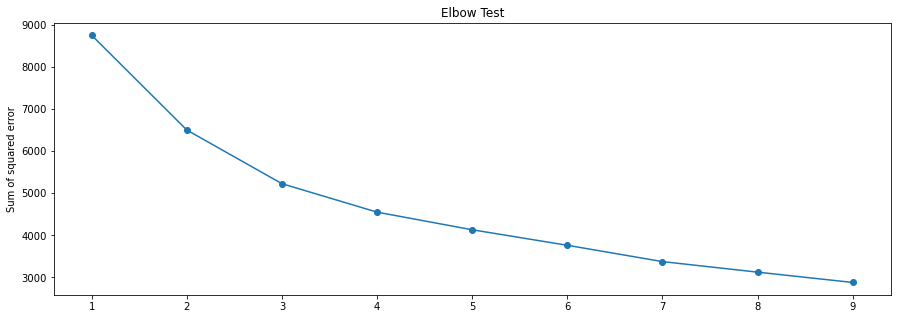

In [18]:
Sum_of_squared_error = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(BartRider_normalized)
    Sum_of_squared_error.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.scatter(range(1, 10), Sum_of_squared_error)
plt.plot(range(1, 10), Sum_of_squared_error)
plt.ylabel('Sum of squared error')
plt.title('Elbow Test')

k = 3 would be ideal because anything more would have significant diminishing returns beyond that point.